In [1]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("WordCloud") \
    .getOrCreate()


In [12]:
def trata_tweets(df):
    words = df\
        .select(f.explode(f.split(f.lower('_c0'), " "))\
        .alias("word"))\
        .withColumn('word', f.regexp_replace('word', r'http\S+', '')) \
            .withColumn('word', f.regexp_replace('word', r'@\w+', '')) \
                .withColumn('word', f.regexp_replace('word', 'rt', '')) \
                    .na.replace('', None) \
                        .na.drop()
    return words


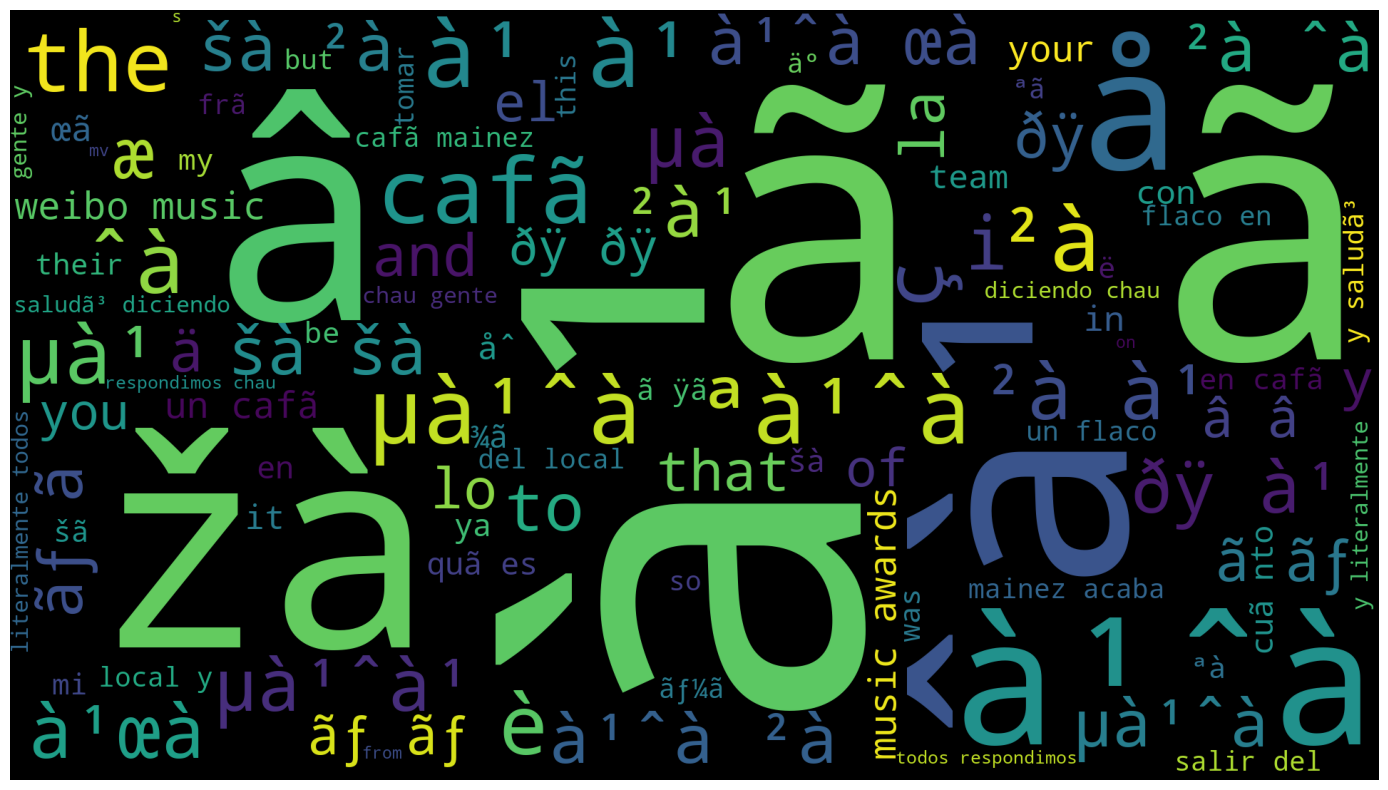

In [17]:
stops = stopwords.words('portuguese')   
stops.append('DNA')  
plt.figure(figsize=(20, 10)) 

while True:
    try:
        words = spark.read.csv('D:\Romario\Programar\Alura\spark\streaming\csv', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ''
        for row in rows:
            all_words = all_words + ' ' + row['word']
            
        wordcloud = WordCloud(stopwords=stops,
                     background_color="black",
                     width=1920,
                     height=1080,
                     max_words=100).generate(all_words)
        plt.cla()
        plt.axis('off') 
        plt.imshow(wordcloud) 
        display.display(plt.gcf())
        display.clear_output(wait=True)  
        time.sleep(5)
        
    except KeyboardInterrupt:
        break

         



